In [90]:
import numpy as np
import glob
import os
from tqdm.notebook import tqdm
from icecream import ic
from itertools import product
import matplotlib.pyplot as plt

In [84]:
input_dir = '/ssd2/tingting/HFMLNewFiles-old-parsed-hits/trigger/1/'
trigger_filenames = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.startswith('event') and not f.endswith('_ID.npz')])

KeyboardInterrupt: 

In [ ]:
input_dir = '/ssd2/tingting/HFMLNewFiles-old-parsed-hits/nontrigger/0/'
non_trigger_filenames = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.startswith('event') and not f.endswith('_ID.npz')])

In [99]:
def momentum_filter(momentums, hits):
    filtered_momentums = []
    filtered_hits = []
    for m, h in zip(momentums, hits):
        if m is not None:
            filtered_momentums.append(m)
            filtered_hits.append(h)
    return np.stack(filtered_momentums, axis=0), np.stack(filtered_hits, axis=0)

def get_indices(momentums):
    indices = []
    for i, m in enumerate(momentums):
        if m is not None:
            indices.append(i)
    return np.array(indices, dtype=int)

def get_tracks_filename(filename):
    return filename.replace('-hits', '')

In [112]:
trigger_momentum_pixels = []
trigger_momentums = []
trigger_pixels = []
trigger_energy = []
for filename in tqdm(trigger_filenames[:10000]):
    hits = np.load(filename, allow_pickle=True)
    indices = get_indices(hits['p_momentum'])
    trigger_momentum_pixels.extend(hits['hits'][indices][:, -1])
    trigger_momentums.extend(np.linalg.norm(np.stack(hits['p_momentum'][indices], axis=0), axis=-1))
    pids = hits['pid'][indices]
    hits = np.load(filename, allow_pickle=True)
    tracks = np.load(get_tracks_filename(filename), allow_pickle=True)
    track_pids = tracks['pids']


    for pid in set(pids):
        pid_pixels = hits['hits'][indices][pids == pid][:, -1]
        pid_energy = tracks['energy'][track_pids == pid]
        for p, e in product(pid_pixels, pid_energy):
            trigger_pixels.append(p)
            trigger_energy.append(e)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [113]:
non_trigger_momentum_pixels = []
non_trigger_momentums = []
non_trigger_pixels = []
non_trigger_energy = []
for filename in tqdm(non_trigger_filenames[:10000]):
    hits = np.load(filename, allow_pickle=True)
    indices = get_indices(hits['p_momentum'])
    if len(indices) == 0:
        continue
    non_trigger_momentum_pixels.extend(hits['hits'][indices][:, -1])
    non_trigger_momentums.extend(np.linalg.norm(np.stack(hits['p_momentum'][indices], axis=0), axis=-1))
    pids = hits['pid'][indices]
    hits = np.load(filename, allow_pickle=True)
    momentums = hits['p_momentum']
    tracks = np.load(get_tracks_filename(filename), allow_pickle=True)
    track_pids = tracks['pids']


    for pid in set(pids):
        pid_pixels = hits['hits'][indices][pids == pid][:, -1]
        pid_energy = tracks['energy'][track_pids == pid]
        for p, e in product(pid_pixels, pid_energy):
            non_trigger_pixels.append(p)
            non_trigger_energy.append(e)

  0%|          | 0/10000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Trigger Pixels vs Energy')

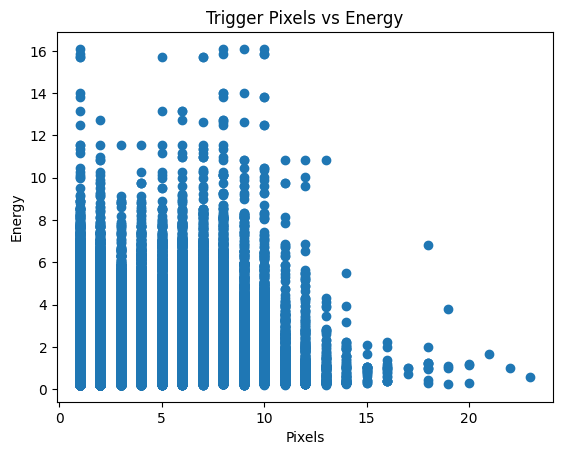

In [114]:
plt.scatter(trigger_pixels, trigger_energy)
plt.xlabel('Pixels')
plt.ylabel('Energy')
plt.title("Trigger Pixels vs Energy")

Text(0.5, 1.0, 'Non-Trigger Pixels vs Energy')

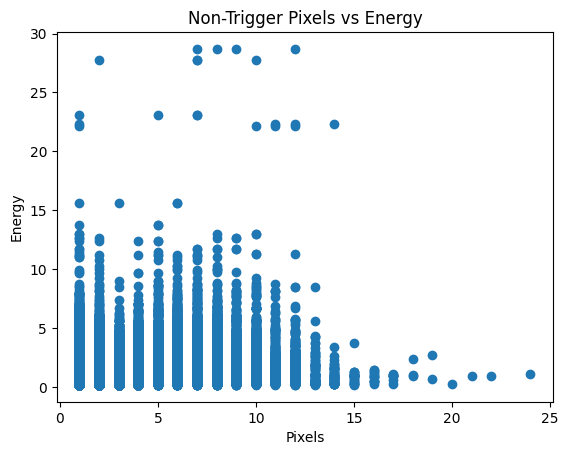

In [115]:
plt.scatter(non_trigger_pixels, non_trigger_energy)
plt.xlabel('Pixels')
plt.ylabel('Energy')
plt.title("Non-Trigger Pixels vs Energy")

Text(0.5, 1.0, 'Trigger Pixels vs Momentum')

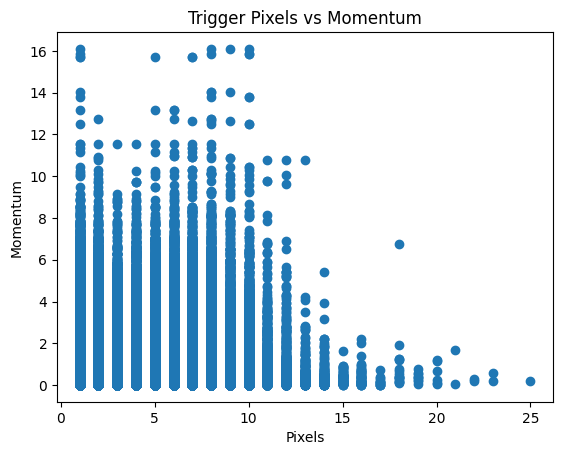

In [116]:
plt.scatter(trigger_momentum_pixels, trigger_momentums)
plt.xlabel('Pixels')
plt.ylabel('Momentum')
plt.title("Trigger Pixels vs Momentum")

Text(0.5, 1.0, 'Non-Trigger Pixels vs Momentum')

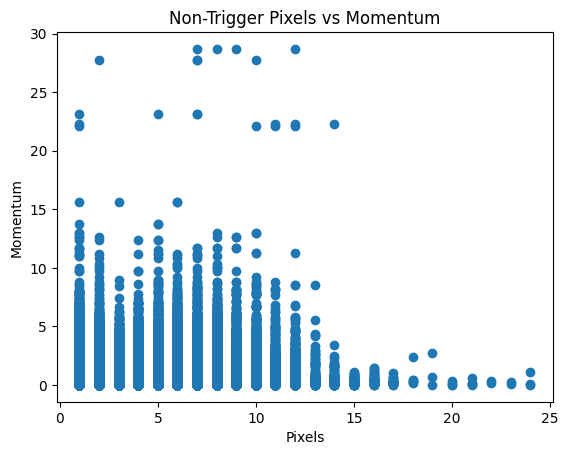

In [117]:
plt.scatter(non_trigger_momentum_pixels, non_trigger_momentums)
plt.xlabel('Pixels')
plt.ylabel('Momentum')
plt.title("Non-Trigger Pixels vs Momentum")